# Using SQL, Python and Jupyter Lab for A/B testing

This notebook aims to display my skills in A/B tesing and using t-tests to inform business decision making. The source dataset I have used for this can be found at [https://www.kaggle.com/datasets/furth3r/facebook-ab-test-of-bidding-feature]. 

The dataset is based on Facebook testing a new bidding system, namely "average bidding" alongside the existing system "maximum bidding". Average bidding means that advertisers are able to set an average price per impression whereas maximum bidding allows advertisers to set the maximum price per impression. 

The business challenge is to determine which bidding system is most effective for **maximising clicks and purchases** and **identifying a statistically significant difference between the two groups.**

The campaigns were run over a 40-day period comparing each on four factors: impressions (number of times an ad is shown), clicks (number of times an ad is clicked), purchases (conversions after clicks) and earnings (revenue generated).

The results of the tests will guide decision making around future advertising strategies. 


Given the requirements outlined above we can create our hypotheses for the a/b test. They are as follows:
- H0 Null hypothesis: There is no significant difference between the average bidding strategy and the maximum bidding strategy (e.g. mean clicks from average bidding is equal to mean clicks from maximum bidding)
- H1 Alternative hypothesis: There is a significant difference between the two bidding strategies (e.g. mean clicks from average bidding is not equal to mean clicks from maximum bidding)

My first step is to create my dataset by joining the two tables together in order to complete the analysis

In [1]:
import os
os.chdir(r"C:\Users\Natha\Documents\practice with jupyter\a-b-testing")  # Change directory
print(os.getcwd())

C:\Users\Natha\Documents\practice with jupyter\a-b-testing


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import seaborn as sb
import matplotlib.pyplot as plt

df_control = pd.read_csv("control_group.csv")
df_test = pd.read_csv("test_group.csv")

df_control["ad_variant"] = "control"
df_test["ad_variant"] = "test"

df = pd.concat([df_control, df_test], ignore_index=True)

print(df.head())


   Impression  Click  Purchase  Earning ad_variant
0       82529   6090       665     2311    control
1       98050   3383       315     1743    control
2       82696   4168       458     1798    control
3      109914   4911       487     1696    control
4      108458   5988       441     1544    control


Then I need to check and clean the data. These are the steps that I run through. First, I check if there are any missing values in the data (in this case there is not). Then I will check the data types and follow this by visualizing the data for any outliers which it looks like there might be some. 

In [3]:
print(df.isnull().sum())

print(df.dtypes)

Impression    0
Click         0
Purchase      0
Earning       0
ad_variant    0
dtype: int64
Impression     int64
Click          int64
Purchase       int64
Earning        int64
ad_variant    object
dtype: object


In [4]:
print(df_control.describe())
print(df_test.describe())

          Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   101711.450000  5100.625000  550.900000  1908.575000
std     20302.122984  1329.957772  134.110517   302.868329
min     45476.000000  2190.000000  267.000000  1254.000000
25%     85726.750000  4124.250000  470.500000  1685.750000
50%     99790.500000  5001.500000  531.500000  1975.000000
75%    115212.500000  5923.500000  638.000000  2120.000000
max    147539.000000  7959.000000  802.000000  2497.000000
          Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   120512.425000  3967.550000  582.050000  2514.925000
std     18807.466616   923.071766  161.175164   282.707912
min     79034.000000  1837.000000  312.000000  1940.000000
25%    112692.250000  3376.500000  444.750000  2280.250000
50%    119291.500000  3931.500000  551.000000  2544.500000
75%    132050.750000  4660.250000  699.750000  2761.7500

<Axes: xlabel='ad_variant', ylabel='Earning'>

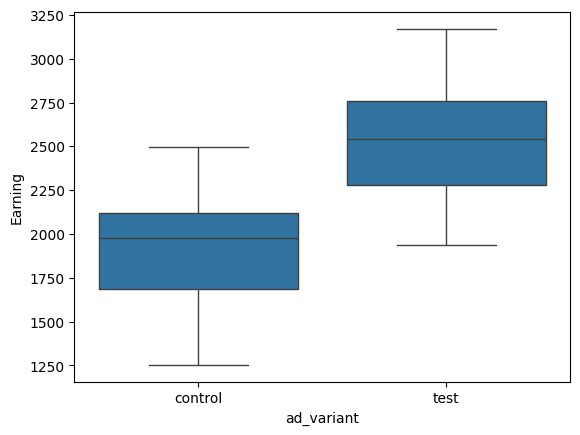

In [5]:
sb.boxplot(x= "ad_variant", y="Earning", data=df)


<Axes: xlabel='ad_variant', ylabel='Click'>

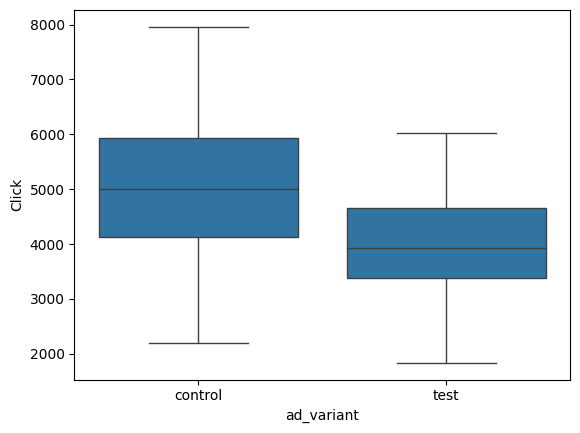

In [6]:
sb.boxplot(x= "ad_variant", y="Click", data=df)

<Axes: xlabel='ad_variant', ylabel='Impression'>

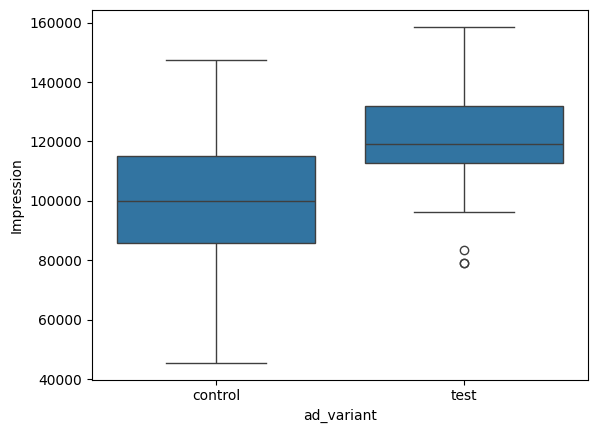

In [7]:
sb.boxplot(x= "ad_variant", y="Impression", data=df)

<Axes: xlabel='ad_variant', ylabel='Purchase'>

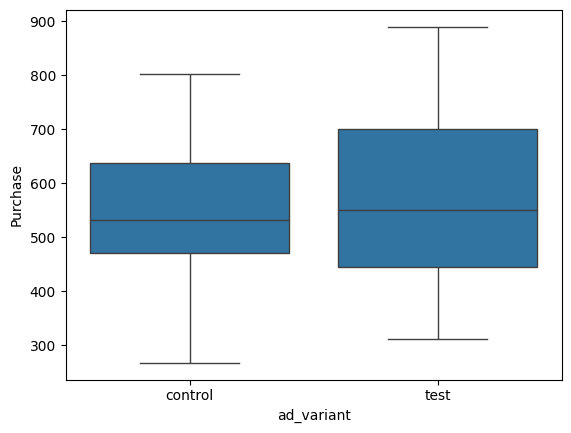

In [8]:
sb.boxplot(x= "ad_variant", y="Purchase", data=df)


Given that there are outliers in the data, the next step is to remove these outliers from the test values of the impressions group. I will do this by removing the 

In [10]:
df["Impression"] = np.clip(df["Impression"], df["Impression"].quantile(0.05), df["Impression"].quantile(0.95))

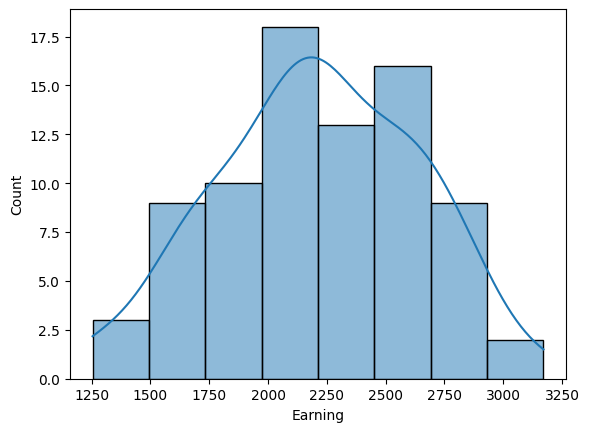

Shapiro-Wilk Test: Statistic=0.9869351358869507, p-value=0.5943430228676422


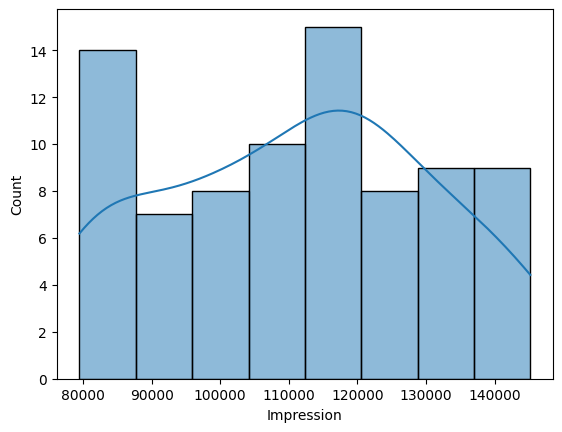

Shapiro-Wilk Test: Statistic=0.9556908988592264, p-value=0.00740125707838656


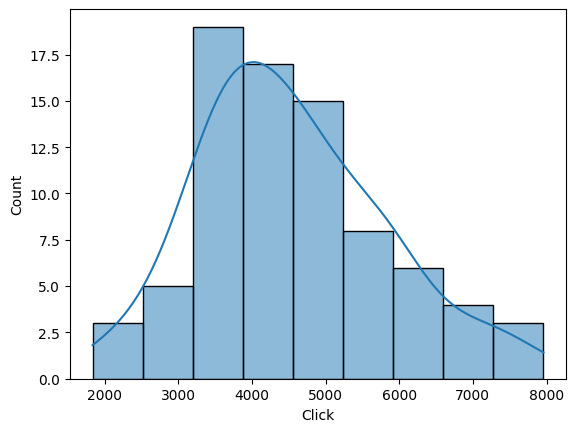

Shapiro-Wilk Test: Statistic=0.9771397645246575, p-value=0.1617902389655515


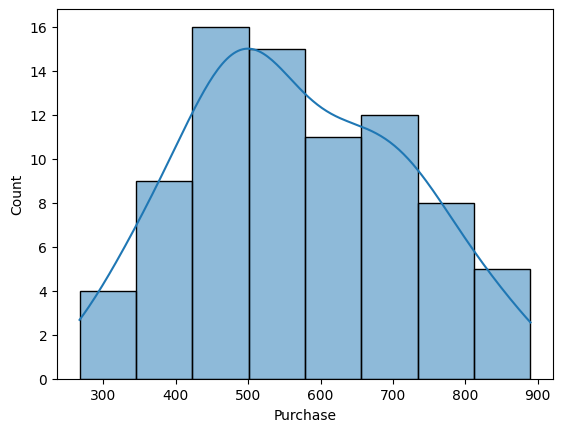

Shapiro-Wilk Test: Statistic=0.9807788659329958, p-value=0.2718538629733429


In [11]:
sb.histplot(df["Earning"], kde=True)
plt.show()

stat, p = shapiro(df["Earning"])
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p}")

sb.histplot(df["Impression"], kde=True)
plt.show()

stat, p = shapiro(df["Impression"])
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p}")

sb.histplot(df["Click"], kde=True)
plt.show()

stat, p = shapiro(df["Click"])
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p}")

sb.histplot(df["Purchase"], kde=True)
plt.show()

stat, p = shapiro(df["Purchase"])
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p}")

Given that the p-values of the normality testing are all greater than 0.05 we know that the data is normally distributed. I am going to use a welch t-test that does not require equal variance of the two groups.

In [12]:
control_clicks = df[df["ad_variant"] == "control"]["Click"]
test_clicks = df[df["ad_variant"] == "test"]["Click"]

t_stat_click, p_value_click = stats.ttest_ind(control_clicks, test_clicks, equal_var=False)
print(f"T-statistic for click:{t_stat_click: .4f}, p-value:{p_value_click: .4f}")
print("Click is statistically significant!" if p_value_click < 0.05 else "Click is NOT statistically significant.")

control_purchase = df[df["ad_variant"] == "control"]["Purchase"]
test_purchase = df[df["ad_variant"] == "test"]["Purchase"]

t_stat_purchase, p_value_purchase =  stats.ttest_ind(control_purchase, test_purchase, equal_var=False)
print(f'T-statistic for purchase:{t_stat_purchase: .4f}, p-value:{p_value_purchase: .4f}')
print("Purchase is statistically significant" if p_value_purchase < 0.05 else "Purchase is NOT statistically significant")

control_earning = df[df["ad_variant"] == "control"]["Earning"]
test_earning = df[df["ad_variant"] == "test"]["Earning"]

t_stat_earning, p_value_earning =  stats.ttest_ind(control_earning, test_earning, equal_var=False)
print(f'T-statistic for earning:{t_stat_earning: .4f}, p-value:{p_value_earning: .4f}')
print("Earning is statistically significant" if p_value_earning < 0.05 else "Earning is NOT statistically significant")

control_impression = df[df["ad_variant"] == "control"]["Impression"]
test_impression = df[df["ad_variant"] == "test"]["Impression"]

t_stat_impression, p_value_impression =  stats.ttest_ind(control_impression, test_impression, equal_var=False)
print(f'T-statistic for impression:{t_stat_impression: .4f}, p-value:{p_value_impression: .4f}')
print("Impression is statistically significant" if p_value_impression < 0.05 else "Impression is NOT statistically significant")

T-statistic for click: 4.4266, p-value: 0.0000
Click is statistically significant!
T-statistic for purchase:-0.9396, p-value: 0.3504
Purchase is NOT statistically significant
T-statistic for earning:-9.2561, p-value: 0.0000
Earning is statistically significant
T-statistic for impression:-4.3043, p-value: 0.0000
Impression is statistically significant


## SQL coding

In order to show that I have skill in SQL I have created queries in SQL to answer more advanced questions about the data. These include looking at t-tests of **CTR (Click through rate)** where the number of impressions are divided by the number of clicks to see how many people clicked on each advertisement. Here is a snippet of the code I used. 

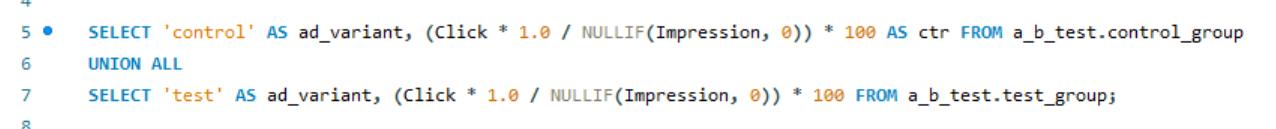

I repeated this for the **CVR (conversion rate)** where it looked at the number of clicks that were converted into a purchase. 

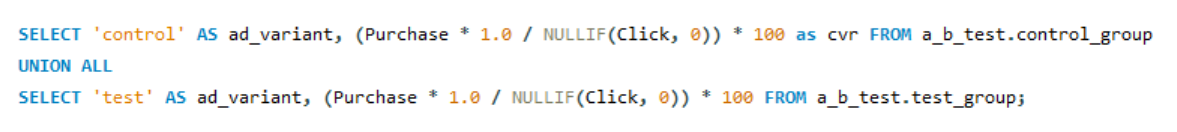

Next I analysed the results for the **EPC (earnings per click)** where this examined the amount of Earnings per click.

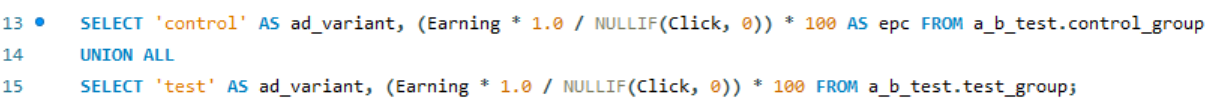

In [ ]:
df = pd.read_csv("ctr_results.csv")

control_ctr = df[df["ad_variant"] == "control"]["ctr"]
test_ctr = df[df["ad_variant"] == "test"]["ctr"]

t_stat_ctr, p_value_ctr = stats.ttest_ind(control_ctr, test_ctr, equal_var=False)
print(f"T-statistic for CTR: {t_stat_ctr: .4f}, P-value: {p_value_ctr:.4f}")
print("CTR is statistically significant!" if p_value_ctr < 0.05 else "CTR is NOT statistically significant.")


control_mean_ctr = control_ctr.mean()
test_mean_ctr = test_ctr.mean()

print(f"Mean CTR for Control: {control_mean_ctr:.4f}")
print(f"Mean CTR for Test: {test_mean_ctr:.4f}")

df = pd.read_csv("cvr_results.csv")

cvr_test = df[df["ad_variant"] == "control"]["cvr"]
cvr_control = df[df["ad_variant"] == "test"]["cvr"]

t_stat_cvr, p_value_cvr = stats.ttest_ind(cvr_control, cvr_test, equal_var=False)
print(f"T-statistic for CVR: {t_stat_cvr: .4f}, P-value is: {p_value_cvr: .4f}")
print("CVR t-test is significant" if p_value_cvr < 0.05 else "CVR t-test is NOT significant")

print(f"Mean CVR for control: {cvr_control.mean(): .4f}")
print(f"Mean CVR for test: {cvr_test.mean(): .4f}")

df = pd.read_csv("epc_results.csv")

epc_control = df[df["ad_variant"] == "control"]["epc"]
epc_test = df[df["ad_variant"] == "test"]["epc"]

t_stat_epc, p_value_epc = stats.ttest_ind(epc_control, epc_test, equal_var=False)
print(f"T-statistic for epc: {t_stat_epc: .4f}, P-value is: {p_value_epc: .4f}")
print("T-statistic for epc is significant" if p_value_epc < 0.05 else "EPC t-statistic is NOT significant")

print(f"Mean EPC for control: {epc_control.mean(): .4f}")
print(f"Mean EPC for test: {epc_test.mean(): .4f}")

## Conlusions and Recommendations

The main goal of this analysis was to determine if the average bidding system would be an improvement upon the existing maximum bidding system implemented by Facebook advertising campaigns. The business outlined the two key metrics as clicks and purchases. 

The results showed that there was a significant difference between the two bidding types in relation to clicks. The maximum bidding group had statistically more clicks meaning that **the new campaign was less effective in getting people to click on the advertisement.**

Moreover, there was **no statistically significant difference between the two campaigns in terms of the number of purchases completed.** As such, there is no support for either campaign on this factor. 

If we were to look only at these metrics it may suggest that the original maximum bidding campaign was the most effective way to get people to click on the advertisement. However, the average bidding campaign had signifcantly higher earnings than the maximum bidding campaign. 

# SQL Results 

The new average bidding campaign had significantly higher EPC, with a lift of 64% even though the CTR and CVR for this group were both significantly lower (34% and 26% respectively). The messaging, copy or targetting in the control group (maximum bidding) is engaging better than the average bidding system. Further, the landing page, user experience or audience segmentation may be leading to the observed decrease in conversions. However, even though the test group had a lower conversion rate and click through rate it led to significantly higher earnings per click suggesting that it is bringing in more high-value clicks. 

In conclusion, if the primary goal is to increase revenue then it may be best to go with the average bidding group. However, if the goal is to increase engagement then the maximum bidding group will preform better. 

Further analysis could be completed to investigate why this differences are apparent. For example, looking at differences in the messaging, landing page and user experience and trying to create a hybrid version of the two groups may result in even more profitable and engaging advertisements for Facebook ads. 






